In [25]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)

In [27]:
%autoreload
from pathlib import Path
import sys
root = Path().resolve().absolute().parent.parent
print(root)
sys.path.append(str(root))

from src.pipeline import Pipeline, BuilingIdsEnum
pipe = Pipeline()



/Users/matsalexander/Desktop/SolarEnergyImpact


In [ ]:
building_b = pipe.get_data(BuilingIdsEnum.B)
building_c = pipe.get_data(BuilingIdsEnum.C)
building_a = pipe.get_data(BuilingIdsEnum.A)

# from november 1. to 1. mars only use data from dataset b 
# else use data from dataset c and a

# remove from 2024-01-15 from dataset b
mask_b = (building_b['timestamp'] >= '2024-01-15') & (building_b['timestamp'] <= '2024-01-15')
building_b = building_b[~mask_b]

start_winter = '2023-11-01'
end_winter = '2024-03-01'
# mask_b = (building_b['timestamp'] >= start_winter) & (building_b['timestamp'] <= end_winter)
# building_b = building_b[mask_b]

mask_c = (building_c['timestamp'] < start_winter) | (building_c['timestamp'] > end_winter)
building_c = building_c[mask_c]


# building a, not in winter
# remove anomoloes

# mask_a = (building_a['timestamp'] < start_winter) | (building_a['timestamp'] > end_winter)
# building_a = building_a[mask_a]
# mask_a2 = (building_a['timestamp'] >= '2024-07-03') & (building_a['timestamp'] <= '2024-07-07')
# building_a = building_a[~mask_a2]




combined_df = pd.concat([building_b, building_c], ignore_index=True)
# reset index
combined_df = combined_df.reset_index(drop=True)
# Perform the train-test split with stratification based on 'building_id'
train_data, test_data = train_test_split(
    combined_df,
    test_size=0.20,
    random_state=42,
    stratify=combined_df['building']
)

# select features
target = "value_import"
features = ["timestamp", "temperature", "area", "wind_speed"] #, "cloud_fraction", "precipitation", "area", "wind_speed"

train_data = train_data[features + [target]]
test_data = test_data[features + [target]]



In [29]:
# Train the model using AutoGluon
predictor = TabularPredictor(label=target, eval_metric='mean_absolute_error').fit(
    train_data, 
    presets='best_quality',
    excluded_model_types=['KNN']
    )

No path specified. Models will be saved in: "AutogluonModels/ag-20241114_133540"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.13
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.6.0: Mon Jul 29 21:14:30 PDT 2024; root:xnu-10063.141.2~1/RELEASE_ARM64_T6000
CPU Count:          10
Memory Avail:       13.42 GB / 32.00 GB (41.9%)
Disk Space Avail:   601.03 GB / 926.35 GB (64.9%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal 

[1000]	valid_set's l1: 5.38456
[2000]	valid_set's l1: 5.0647
[3000]	valid_set's l1: 4.90083
[4000]	valid_set's l1: 4.80739
[5000]	valid_set's l1: 4.7437
[6000]	valid_set's l1: 4.69949
[7000]	valid_set's l1: 4.65688


	Ran out of time, early stopping on iteration 7467. Best iteration is:
	[7467]	valid_set's l1: 4.64607


[1000]	valid_set's l1: 5.4868
[2000]	valid_set's l1: 5.19035
[3000]	valid_set's l1: 5.02765


	Ran out of time, early stopping on iteration 3696. Best iteration is:
	[3691]	valid_set's l1: 4.95082


[1000]	valid_set's l1: 5.17339
[2000]	valid_set's l1: 4.8711
[3000]	valid_set's l1: 4.71456
[4000]	valid_set's l1: 4.60654
[5000]	valid_set's l1: 4.53536


	Ran out of time, early stopping on iteration 5665. Best iteration is:
	[5665]	valid_set's l1: 4.49885


[1000]	valid_set's l1: 5.363
[2000]	valid_set's l1: 5.09132
[3000]	valid_set's l1: 4.938


	Ran out of time, early stopping on iteration 3933. Best iteration is:
	[3903]	valid_set's l1: 4.84749


[1000]	valid_set's l1: 5.29751
[2000]	valid_set's l1: 4.98568
[3000]	valid_set's l1: 4.82844
[4000]	valid_set's l1: 4.72533


	Ran out of time, early stopping on iteration 4317. Best iteration is:
	[4313]	valid_set's l1: 4.70314


[1000]	valid_set's l1: 5.43035
[2000]	valid_set's l1: 5.16848
[3000]	valid_set's l1: 5.01584


	Ran out of time, early stopping on iteration 3735. Best iteration is:
	[3709]	valid_set's l1: 4.93793


[1000]	valid_set's l1: 5.34135
[2000]	valid_set's l1: 5.03168
[3000]	valid_set's l1: 4.85528
[4000]	valid_set's l1: 4.74613
[5000]	valid_set's l1: 4.661
[6000]	valid_set's l1: 4.58617


	Ran out of time, early stopping on iteration 6577. Best iteration is:
	[6547]	valid_set's l1: 4.56101


[1000]	valid_set's l1: 5.33793
[2000]	valid_set's l1: 5.0584
[3000]	valid_set's l1: 4.90484
[4000]	valid_set's l1: 4.81947
[5000]	valid_set's l1: 4.75287


	Ran out of time, early stopping on iteration 5796. Best iteration is:
	[5796]	valid_set's l1: 4.70822
	-4.7317	 = Validation score   (-mean_absolute_error)
	573.58s	 = Training   runtime
	1.28s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 23.46s of the 323.58s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 133. Best iteration is:
	[133]	valid_set's l1: 4.99318
	Ran out of time, early stopping on iteration 141. Best iteration is:
	[141]	valid_set's l1: 5.12245
	Ran out of time, early stopping on iteration 140. Best iteration is:
	[140]	valid_set's l1: 4.76073
	Ran out of time, early stopping on iteration 155. Best iteration is:
	[155]	valid_set's l1: 5.02356
	Ran out of time, early stopping on iteration 161. Best iteration is:
	[161]	valid_set's l1: 4.829
	Ran out of time, early stopping on iteration 174. Best iteration is:
	[174]	valid_set's l1

[1000]	valid_set's l1: 5.40836
[2000]	valid_set's l1: 5.08523
[3000]	valid_set's l1: 4.89805
[4000]	valid_set's l1: 4.78217
[5000]	valid_set's l1: 4.69109
[6000]	valid_set's l1: 4.63084
[7000]	valid_set's l1: 4.5825
[8000]	valid_set's l1: 4.54605
[9000]	valid_set's l1: 4.51343
[10000]	valid_set's l1: 4.48813
[1000]	valid_set's l1: 5.41999
[2000]	valid_set's l1: 5.15527
[3000]	valid_set's l1: 5.00131
[4000]	valid_set's l1: 4.89132
[5000]	valid_set's l1: 4.82107
[6000]	valid_set's l1: 4.76444
[7000]	valid_set's l1: 4.71779
[8000]	valid_set's l1: 4.68678
[9000]	valid_set's l1: 4.65724
[10000]	valid_set's l1: 4.63145
[1000]	valid_set's l1: 5.49166
[2000]	valid_set's l1: 5.17814
[3000]	valid_set's l1: 4.99278
[4000]	valid_set's l1: 4.87591
[5000]	valid_set's l1: 4.79311
[6000]	valid_set's l1: 4.72692
[7000]	valid_set's l1: 4.6699
[8000]	valid_set's l1: 4.62315
[9000]	valid_set's l1: 4.58264
[10000]	valid_set's l1: 4.55041
[1000]	valid_set's l1: 5.38948
[2000]	valid_set's l1: 5.08126
[3000]	

	-4.5089	 = Validation score   (-mean_absolute_error)
	987.87s	 = Training   runtime
	3.43s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 803.36s of the 1702.83s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's l1: 4.55837
[2000]	valid_set's l1: 4.49056
[3000]	valid_set's l1: 4.47374


	Ran out of time, early stopping on iteration 3268. Best iteration is:
	[3266]	valid_set's l1: 4.46944


[1000]	valid_set's l1: 4.57555


	Ran out of time, early stopping on iteration 1254. Best iteration is:
	[1248]	valid_set's l1: 4.52928


[1000]	valid_set's l1: 4.53827


	Ran out of time, early stopping on iteration 2014. Best iteration is:
	[2012]	valid_set's l1: 4.43932


[2000]	valid_set's l1: 4.44002
[1000]	valid_set's l1: 4.49358


	Ran out of time, early stopping on iteration 1347. Best iteration is:
	[1313]	valid_set's l1: 4.46281


[1000]	valid_set's l1: 4.53619


	Ran out of time, early stopping on iteration 1665. Best iteration is:
	[1665]	valid_set's l1: 4.41673


[1000]	valid_set's l1: 4.22182
[2000]	valid_set's l1: 4.14622
[3000]	valid_set's l1: 4.13491


	Ran out of time, early stopping on iteration 3014. Best iteration is:
	[2876]	valid_set's l1: 4.13082


[1000]	valid_set's l1: 4.25889
[2000]	valid_set's l1: 4.19812
[3000]	valid_set's l1: 4.1966


	Ran out of time, early stopping on iteration 3371. Best iteration is:
	[2608]	valid_set's l1: 4.18882


[1000]	valid_set's l1: 4.53271
[2000]	valid_set's l1: 4.44832
[3000]	valid_set's l1: 4.43915


	-4.3841	 = Validation score   (-mean_absolute_error)
	697.79s	 = Training   runtime
	0.79s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 104.03s of the 1003.51s of remaining time.
	-3.3765	 = Validation score   (-mean_absolute_error)
	1.43s	 = Training   runtime
	0.43s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 101.78s of the 1001.25s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 2964.
	Ran out of time, early stopping on iteration 2975.
	Ran out of time, early stopping on iteration 3097.
	Ran out of time, early stopping on iteration 3181.
	Ran out of time, early stopping on iteration 3270.
	Ran out of time, early stopping on iteration 3397.
	Ran out of time, early stopping on iteration 3557.
	Ran out of time, early stopping on iteration 3957.
	-4.4912	 = Validation score   (-mean_absolute_error)
	97

In [30]:
# winter3 first predictor = TabularPredictor.load("AutogluonModels/ag-20241113_235901")
# Evaluate on test data
performance = predictor.evaluate(test_data)
# best model: ag-20241022_161331

print("Evaluation Performance:")
performance
# reset index 
test_data = test_data.reset_index(drop=True)
# To see feature importance
global_importance = predictor.feature_importance(test_data)
print("\nFeature Importance:")
print(global_importance)  # Shows which features had the most impact on model predictions


Computing feature importance via permutation shuffling for 3 features using 3566 rows with 5 shuffle sets...


Evaluation Performance:


	150.27s	= Expected runtime (30.05s per shuffle set)
	99.19s	= Actual runtime (Completed 5 of 5 shuffle sets)



Feature Importance:
             importance    stddev       p_value  n  p99_high   p99_low
area           5.904166  0.200952  1.607860e-07  5  6.317929  5.490402
timestamp      5.426094  0.050479  8.987353e-10  5  5.530031  5.322156
temperature    5.267191  0.104772  1.877635e-08  5  5.482917  5.051464


In [31]:
performance

{'mean_absolute_error': -3.2692989379906345,
 'root_mean_squared_error': -4.7716187976610325,
 'mean_squared_error': -22.768345950192113,
 'r2': 0.8600666500763289,
 'pearsonr': 0.9274823410190682,
 'median_absolute_error': -2.0179219055175786}

In [32]:
# model location => AutogluonModels/ag-20241016_095906
main_building = pipe.get_data(BuilingIdsEnum.MAIN)

data_predict = main_building[features]
data_predict


,timestamp,temperature,area
0,2023-07-01 00:00:00,13.6,1199
1,2023-07-01 01:00:00,13.2,1199
2,2023-07-01 02:00:00,12.3,1199
3,2023-07-01 03:00:00,11.9,1199
4,2023-07-01 04:00:00,11.9,1199
...,...,...,...
10338,2024-09-03 18:00:00,17.8,1199
10339,2024-09-03 19:00:00,17.8,1199
10340,2024-09-03 20:00:00,17.7,1199
10341,2024-09-03 21:00:00,18.0,1199


In [33]:
prediciton1 = predictor.predict(data_predict)

In [34]:
# save predicitons as a csv in data folder from root.
import datetime
from pathlib import Path


prediciton1_df = pd.DataFrame(prediciton1)
date_time = datetime.datetime.now().strftime("%Y%m%d_%H")
my_path = Path().resolve().parent.parent / 'data'/ "pred" / 'prediction_winter3.csv'
if my_path.exists():
    my_path = Path().resolve().parent.parent / 'data'/ "pred" / f'prediction_winter3_{date_time}.csv'
# create folder
my_path.parent.mkdir(parents=True, exist_ok=True)
prediciton1_df.to_csv(my_path, index=False)

In [35]:
import numpy as np
# Reset index if needed
test_data = test_data.reset_index(drop=True)

# Compute SMAPE witch means Symmetric Mean Absolute Percentage Error
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred)
    smape_values = np.where(denominator != 0, diff / denominator, 0)
    return np.mean(smape_values) * 100

# Replace 'target_column' with your actual target column name
y_true = test_data[target]
y_pred = predictor.predict(test_data)
smape_value = smape(y_true, y_pred)
print(f"\nSMAPE: {smape_value:.2f}%")

# Analyze percent-wise errors
percentage_errors = np.abs((y_true - y_pred) / y_true) * 100
percentage_errors = np.where(y_true != 0, percentage_errors, 0)

mean_percentage_error = np.mean(percentage_errors)
median_percentage_error = np.median(percentage_errors)
max_percentage_error = np.max(percentage_errors)


SMAPE: 11.02%


Mean Percentage Error: 13.59%
Median Percentage Error: 5.92%
Max Percentage Error: 5874.37%


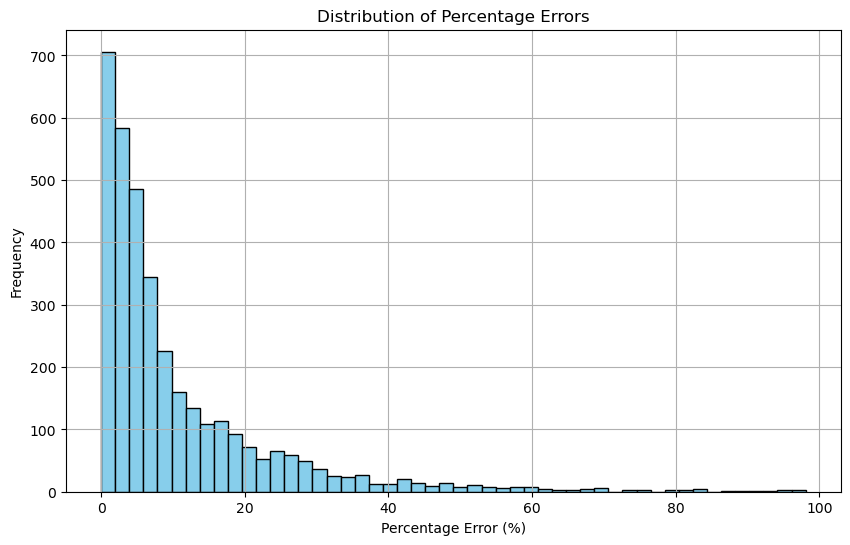

In [38]:

print(f"Mean Percentage Error: {mean_percentage_error:.2f}%")
print(f"Median Percentage Error: {median_percentage_error:.2f}%")
print(f"Max Percentage Error: {max_percentage_error:.2f}%")
percentage_errors_trimmed = percentage_errors[percentage_errors < 100]
# Plot percentage error distribution
plt.figure(figsize=(10, 6))
plt.hist(percentage_errors_trimmed, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Percentage Error (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Percentage Errors')
plt.grid(True)
plt.show()

# Feature Importance
# global_importance = predictor.feature_importance(test_data)


Feature Importance:
             importance    stddev       p_value  n  p99_high   p99_low
area           5.904166  0.200952  1.607860e-07  5  6.317929  5.490402
timestamp      5.426094  0.050479  8.987353e-10  5  5.530031  5.322156
temperature    5.267191  0.104772  1.877635e-08  5  5.482917  5.051464


<Figure size 1200x800 with 0 Axes>

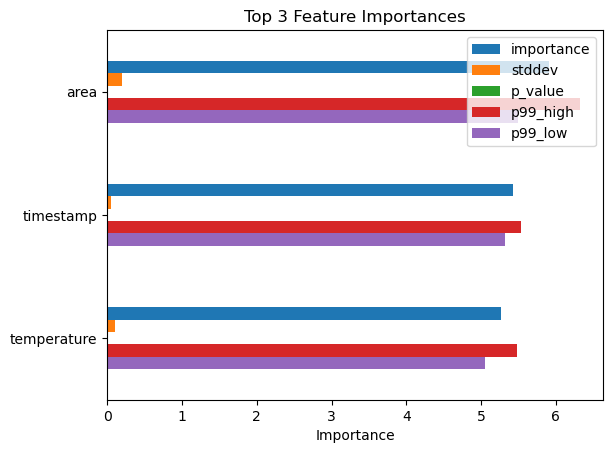

In [37]:
print("\nFeature Importance:")
print(global_importance)

# Plot top 20 feature importances
plt.figure(figsize=(12, 8))
# remove the n from the golbal_importance plot
global_importance.columns
# Index(['importance'	'stddev'	'p_value'	'n'	'p99_high'	'p99_low']	dtype='object')

if 'n' in global_importance.columns:
    global_importance = global_importance.drop(columns=['n'])
global_importance.head(20).plot(kind='barh')

plt.xlabel('Importance')
plt.title('Top 3 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

# Optional: SHAP Values for advanced insights
# explainer = predictor.explain(test_data, model='best')
# explainer.plot_feature_importance()


In [ ]:
from src.utils import ColumnParam, plot_energy_usage

plot_cols =[
    ColumnParam("value_import", "Energy Import"),
    ColumnParam("net_consumption", "Net Consumption"),
    ColumnParam("predicted_consumption", "Predicted Consumption"),
]
main = pipe.get_data(BuilingIdsEnum.MAIN)

# Merge the predicted values with the actual values on index and call the new columns 'predicted_consumption2'
# daily_main = daily_main.merge(prediciton1_df, left_index=True, right_index=True)
# daily_main = daily_main.rename(columns={"value_import_x": 'predicted_consumption'})
# # trim
# daily_main = daily_main.iloc[1:-1]
# plot_energy_usage(daily_main, plot_cols,
#                   titel="Energy Usage actual vs predicted",
#                   yaxis_title="Energy [kWh]",
#                   tozeroy=True,
#                   )

,timestamp,predicted_consumption,value_export,solar_consumption,net_consumption,net_consumption_per_sqm,predicted_consumption,building,property_id,area,temperature,wind_speed,wind_direction,cloud_fraction,precipitation,spot_price_nok,value_import_y
0,2023-07-02,903.50,178.00,955.427660,1680.927660,1.401941,1757.470821,main building,10724,1199,17.239583,2.479167,251.500000,0.570833,0.189583,1.137242,25.746155
1,2023-07-09,4324.30,220.10,2663.311274,6767.511274,5.644296,7397.542175,main building,10724,1199,17.372024,2.097619,96.300000,0.583929,0.150595,0.734471,25.609608
2,2023-07-16,5008.30,66.70,1734.309332,6675.909332,5.567898,7472.545071,main building,10724,1199,16.825595,2.894643,63.200000,0.738690,0.180952,1.041394,27.073210
3,2023-07-23,4155.10,169.10,2656.076572,6642.076572,5.539680,6819.156256,main building,10724,1199,16.225000,2.585119,201.500000,0.573810,0.008929,0.496056,27.110697
4,2023-07-30,4563.50,219.40,2299.114591,6643.214591,5.540629,6869.377289,main building,10724,1199,15.952381,2.278571,0.300000,0.583929,0.111905,0.674216,27.063702
5,2023-08-06,4547.50,70.40,2227.371748,6704.471748,5.591720,7471.431577,main building,10724,1199,16.923810,1.627976,160.600000,0.605952,0.085119,0.664450,26.109138
6,2023-08-13,5090.10,52.20,1571.916839,6609.816839,5.512775,7141.931791,main building,10724,1199,15.998810,2.424405,313.400000,0.749405,0.205357,0.588623,28.459934
7,2023-08-20,5411.10,36.50,1423.202317,6797.802317,5.669560,8146.789063,main building,10724,1199,18.184524,2.311310,183.200000,0.752381,0.229762,0.867745,29.813784
8,2023-08-27,4992.00,57.40,1747.366035,6681.966035,5.572949,7195.936084,main building,10724,1199,16.333333,1.788095,153.100000,0.628571,0.067262,0.847740,27.845287
9,2023-09-03,4719.90,5.50,1952.757229,6667.157229,5.560598,6610.651114,main building,10724,1199,15.094643,1.406548,122.100000,0.472619,0.004167,0.909783,23.036877
